# Veri Ön İşleme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv("verikümesi.csv", sep = ';')

# V1 sütunu object tipinde olduğu için sayısal bir formata dönüştürüyoruz.
cleaned_dataset = dataset.copy()
cleaned_dataset['V1'] = pd.to_numeric(cleaned_dataset['V1'], errors='coerce')

mean_value = cleaned_dataset['V1'].mean()

# Sayısal olmayan değerleri ortalamayla değiştiriyoruz.
cleaned_dataset.loc[~cleaned_dataset['V1'].notnull(), 'V1'] = mean_value


y = cleaned_dataset['Class']
X = cleaned_dataset.drop(['Class', 'Unnamed: 31', 'Unnamed: 32'], axis = 1)


# # Logistic Regression, SVM Algoritması

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

def evaluate_models(X, y, test_size):
    # Veri setini train ve test olarak ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    # Veri setini ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelleri oluşturma
    logistic_model = LogisticRegression()
    svm_model = SVC(probability=True)

    # Modelleri eğitme
    logistic_model.fit(X_train_scaled, y_train)  # Ölçeklendirilmiş verilerle modeli eğittik
    svm_model.fit(X_train_scaled, y_train)  # Ölçeklendirilmiş verilerle modeli eğittik

    # Tahminleri yapma
    logistic_pred = logistic_model.predict(X_test_scaled)
    svm_pred = svm_model.predict(X_test_scaled)

    # Değerlendirme metriklerini hesaplama ve raporlama
    logistic_accuracy = accuracy_score(y_test, logistic_pred)
    svm_accuracy = accuracy_score(y_test, svm_pred)

    logistic_precision = precision_score(y_test, logistic_pred)
    svm_precision = precision_score(y_test, svm_pred)

    logistic_recall = recall_score(y_test, logistic_pred)
    svm_recall = recall_score(y_test, svm_pred)

    logistic_f1 = f1_score(y_test, logistic_pred)
    svm_f1 = f1_score(y_test, svm_pred)

    # Sonuçları raporlama
    print(f"Test size: {test_size}")
    print("Logistic Regression:")
    print("Accuracy:", logistic_accuracy)
    print("Precision:", logistic_precision)
    print("Recall:", logistic_recall)
    print("F1 Score:", logistic_f1)
    print()
    print("SVM:")
    print("Accuracy:", svm_accuracy)
    print("Precision:", svm_precision)
    print("Recall:", svm_recall)
    print("F1 Score:", svm_f1)
    print()
    
for test_size in [0.7, 0.6, 0.2]:
    evaluate_models(X, y, test_size)

Test size: 0.7
Logistic Regression:
Accuracy: 0.9831632653061224
Precision: 0.9363057324840764
Recall: 0.8647058823529412
F1 Score: 0.8990825688073395

SVM:
Accuracy: 0.9834183673469388
Precision: 0.9537953795379538
Recall: 0.85
F1 Score: 0.8989113530326595

Test size: 0.6
Logistic Regression:
Accuracy: 0.981547619047619
Precision: 0.9490196078431372
Recall: 0.8316151202749141
F1 Score: 0.8864468864468864

SVM:
Accuracy: 0.9833333333333333
Precision: 0.9875518672199171
Recall: 0.8178694158075601
F1 Score: 0.8947368421052632

Test size: 0.2
Logistic Regression:
Accuracy: 0.9848214285714286
Precision: 0.9651162790697675
Recall: 0.8556701030927835
F1 Score: 0.907103825136612

SVM:
Accuracy: 0.9821428571428571
Precision: 0.9873417721518988
Recall: 0.8041237113402062
F1 Score: 0.8863636363636364



# Farklı Eğitim-Test Oranlarında SVM Performansı

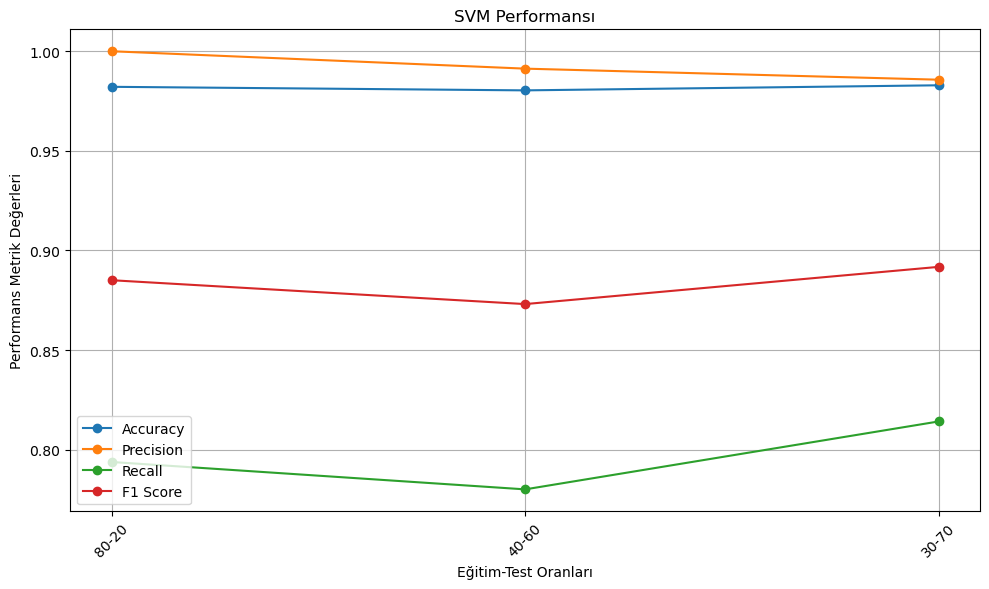

In [10]:
# Veriler
egitim_test_oranlari = ['80-20', '40-60', '30-70']
accuracy = [0.9821428571428571, 0.9803571428571428, 0.9829081632653062]
precision = [1.0, 0.9912663755458515, 0.9857142857142858]
recall = [0.7938144329896907, 0.7800687285223368, 0.8141592920353983]
f1_score = [0.8850574712643678, 0.8730769230769231, 0.8917609046849758]

# Grafik oluşturma
plt.figure(figsize=(10, 6))

plt.plot(egitim_test_oranlari, accuracy, marker='o', label='Accuracy')
plt.plot(egitim_test_oranlari, precision, marker='o', label='Precision')
plt.plot(egitim_test_oranlari, recall, marker='o', label='Recall')
plt.plot(egitim_test_oranlari, f1_score, marker='o', label='F1 Score')

plt.title('SVM Performansı')
plt.xlabel('Eğitim-Test Oranları')
plt.ylabel('Performans Metrik Değerleri')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
#plt.savefig('SVM.jpeg', format='jpeg')

plt.show()


# Farklı Eğitim-Test Oranlarında Logistic Regression Performansı

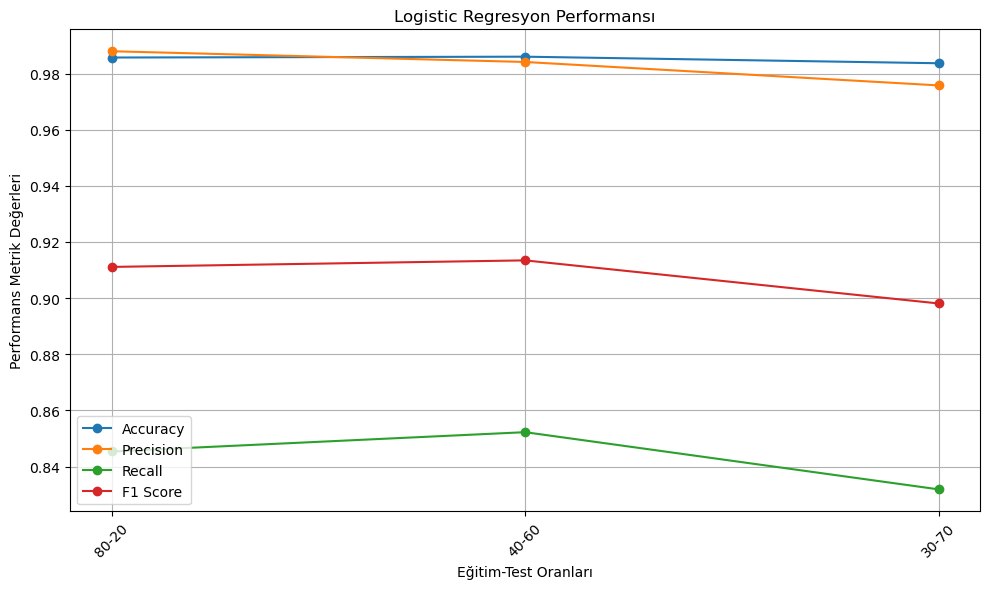

In [11]:
# Veriler
egitim_test_oranlari = ['80-20', '40-60', '30-70']
accuracy = [0.9857142857142858, 0.9860119047619048, 0.9836734693877551]
precision = [0.9879518072289156, 0.9841269841269841, 0.9757785467128027]
recall = [0.845360824742268, 0.852233676975945, 0.831858407079646]
f1_score = [0.9111111111111111, 0.9134438305709024, 0.8980891719745223]

# Grafik oluşturma
plt.figure(figsize=(10, 6))

plt.plot(egitim_test_oranlari, accuracy, marker='o', label='Accuracy')
plt.plot(egitim_test_oranlari, precision, marker='o', label='Precision')
plt.plot(egitim_test_oranlari, recall, marker='o', label='Recall')
plt.plot(egitim_test_oranlari, f1_score, marker='o', label='F1 Score')

plt.title('Logistic Regresyon Performansı')
plt.xlabel('Eğitim-Test Oranları')
plt.ylabel('Performans Metrik Değerleri')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
#plt.savefig('Logistic.jpeg', format='jpeg')

plt.show()